# HSE 2021: Mathematical Methods for Data Analysis

## Homework 2

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.datasets import load_boston

%matplotlib inline

sns.set(style="darkgrid")

### Data

For this homework we use Boston Dataset from sklearn (based on UCI ML housing dataset).

In [6]:
import sklearn

sklearn.__version__

'1.0'

In [7]:
data = load_boston() # load dataset

data_X = data.data
data_Y = data.target
data_Columns = data.feature_names

D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
  

## Linear regression

#### 1. [0.5 points] 
Create Pandas DataFrame and split the data into train and test sets with ratio 80:20 with random_state=0.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, train_size=.8, random_state=0)

# Normalization
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Creating data frames
X_train = pd.DataFrame(data=X_train, columns=data_Columns, index=np.arange(len(X_train)))
X_test = pd.DataFrame(data=X_test, columns=data_Columns, index=np.arange(len(X_test)))

---
#### 2. [1 point] 
Train models on train data using StatsModels( or sckit-learn) library and apply it to the test set; use $RMSE$ and $R^2$ as the quality measure.

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.01$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.01$

Don't forget to scale the data before training the models with StandardScaler!

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

clsfs = [
    LinearRegression(),
    Ridge(alpha=0.01),
    Lasso(alpha=0.01)
]

for clsf in clsfs:
    clsf.fit(X_train, y_train)
    y = clsf.predict(X_test)
    print(f"{str(clsf)} rmse score = {mean_squared_error(y_test, y, squared=False):.3f}"
    + f"; r2 score = {r2_score(y_test, y):.3f}")


LinearRegression() rmse score = 5.926; r2 score = 0.569
Ridge(alpha=0.01) rmse score = 5.926; r2 score = 0.569
Lasso(alpha=0.01) rmse score = 5.937; r2 score = 0.567


---
#### 3. [1 point] 
Explore the values of the parameters of the resulting models and compare the number of zero weights in them. 

Comment on the significance of the coefficients, overal model significance and other related factors from the results table. 

`Hint` Use StatModels to obtain significance of the coefficients. They ca be found on the `summary` of the fitted linear model. 
It might be tricky to obtain `summary` for the regularized model. Please, read the documentation of the StatModels library to figure out how to do that, e.g.   [OLSResults](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html#statsmodels.regression.linear_model.OLSResults) class might be useful here.

In [10]:
for clsf in clsfs:
    arr = clsf.coef_
    print(f'Coefficients for {str(clsf)}')
    print(f"intercept = {clsf.intercept_}")
    # In order of importance
    for i in np.argsort(-np.abs(arr)):
        print(f'{data_Columns[i]} -> {arr[i]:.3f}')
    print()


Coefficients for LinearRegression()
intercept = 22.611881188118836
LSTAT -> -3.592
DIS -> -2.881
RM -> 2.573
PTRATIO -> -2.293
RAD -> 2.112
TAX -> -1.875
NOX -> -1.855
ZN -> 1.057
CRIM -> -0.971
B -> 0.718
CHAS -> 0.595
AGE -> -0.088
INDUS -> 0.038

Coefficients for Ridge(alpha=0.01)
intercept = 22.611881188118836
LSTAT -> -3.592
DIS -> -2.881
RM -> 2.573
PTRATIO -> -2.293
RAD -> 2.111
TAX -> -1.875
NOX -> -1.855
ZN -> 1.057
CRIM -> -0.971
B -> 0.718
CHAS -> 0.595
AGE -> -0.088
INDUS -> 0.038

Coefficients for Lasso(alpha=0.01)
intercept = 22.611881188118836
LSTAT -> -3.596
DIS -> -2.809
RM -> 2.585
PTRATIO -> -2.279
RAD -> 1.956
NOX -> -1.804
TAX -> -1.738
ZN -> 1.022
CRIM -> -0.940
B -> 0.705
CHAS -> 0.595
AGE -> -0.069
INDUS -> -0.000



```Conclusion```

There are two almost-zero parameters: AGE and INDUS

Most coefficients are significant (abs is >1 with intercept = 22.6) so most features are relevant to the model

About 57% of the variance in target is explained by the model (R2 score) which is pretty decent.


---
#### 4. [1 point] 
Implement one of the elimination algorithms that were described in the Seminar_4 (Elimination by P-value, Forward elimination, Backward elimination), make conclusions. 
It's enough to apply to one of the models above (e.g simple linear regression)

### Backward elimination

In [11]:
scaler = StandardScaler()

data_X = scaler.fit_transform(data_X)
data_X = pd.DataFrame(data=data_X, columns=data_Columns, index=np.arange(len(data_X)))

y = data_Y

In [12]:
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score

eliminated = []
features = list(data_Columns)
loss_history = []

while len(features) > 1:
    X = data_X[features]
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    res = model.fit()
    s = res.summary2()
    t = s.tables[1]['P>|t|']
    
    worst_index = t.argmax() - 1
    
    # R2-adjusted
    score = float(s.tables[0][1][6])
    
    if len(loss_history) and loss_history[-1] > score:
        break
    else:
        loss_history.append( score )
        eliminated.append(features[worst_index])
        del features[worst_index]

<BarContainer object of 3 artists>

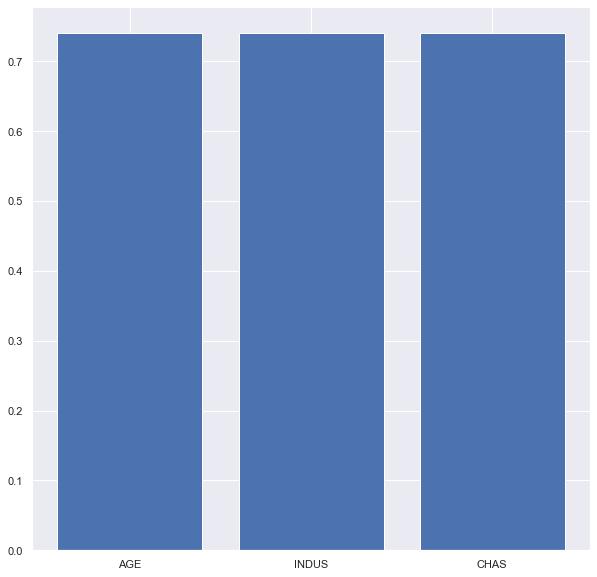

In [13]:
loss_history=np.array(loss_history)

plt.figure(figsize=(10,10))
plt.bar(eliminated, loss_history)

In [14]:
features

['CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

```Conclusion```

The score was best before deleting the feature 'CHAS' so the remaining features are:

'CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'

---
#### 5. [1 point] 
Find the best (in terms of RMSE) $\alpha$ for Ridge regression using cross-validation with 5 folds. You must select values from range $[10^{-4}, 10^{3}]$.

In [15]:
X = data_X#[best_features]

from sklearn.model_selection import GridSearchCV

clsf = Ridge()

parameters = {
    'alpha': np.logspace(-4, 3, 100), 
}

srch = GridSearchCV(
    estimator=clsf,
    scoring='neg_root_mean_squared_error', 
    param_grid=parameters,
    
#     # Cross-validation splits
    cv = 5
)

srch.fit(X, y)

res = srch.cv_results_
res

{'mean_fit_time': array([0.00199475, 0.00199475, 0.00119658, 0.00199442, 0.00139651,
        0.00119677, 0.00179505, 0.00179496, 0.00139604, 0.00199456,
        0.00199466, 0.00179515, 0.00159569, 0.0021946 , 0.00219369,
        0.00159554, 0.0019949 , 0.00199485, 0.00179548, 0.00179501,
        0.0019948 , 0.00119681, 0.0017951 , 0.00199428, 0.00119696,
        0.00179491, 0.0009974 , 0.00119705, 0.0015955 , 0.00119681,
        0.00179501, 0.00199413, 0.00199537, 0.00199461, 0.00199456,
        0.00139618, 0.00199475, 0.00219421, 0.00159569, 0.00179496,
        0.00139613, 0.00199451, 0.00199451, 0.00199432, 0.00199447,
        0.00159569, 0.00099735, 0.00159559, 0.0009974 , 0.00159602,
        0.00159574, 0.00199475, 0.00199461, 0.00219402, 0.00179501,
        0.0017952 , 0.00159578, 0.00139632, 0.00139651, 0.0019948 ,
        0.00219407, 0.0017952 , 0.00139604, 0.00199471, 0.00119677,
        0.0015955 , 0.00099754, 0.00159578, 0.00199447, 0.00199456,
        0.00179505, 0.00179558,

In [16]:
best_alpha_index = res['rank_test_score'].argmin()

print(f"The best value of alpha for Ridge is {res['params'][best_alpha_index]['alpha']:.3f}")
print(f"With a RMSE of {-res['mean_test_score'][best_alpha_index]:.3f}")

The best value of alpha for Ridge is 73.907
With a RMSE of 5.405


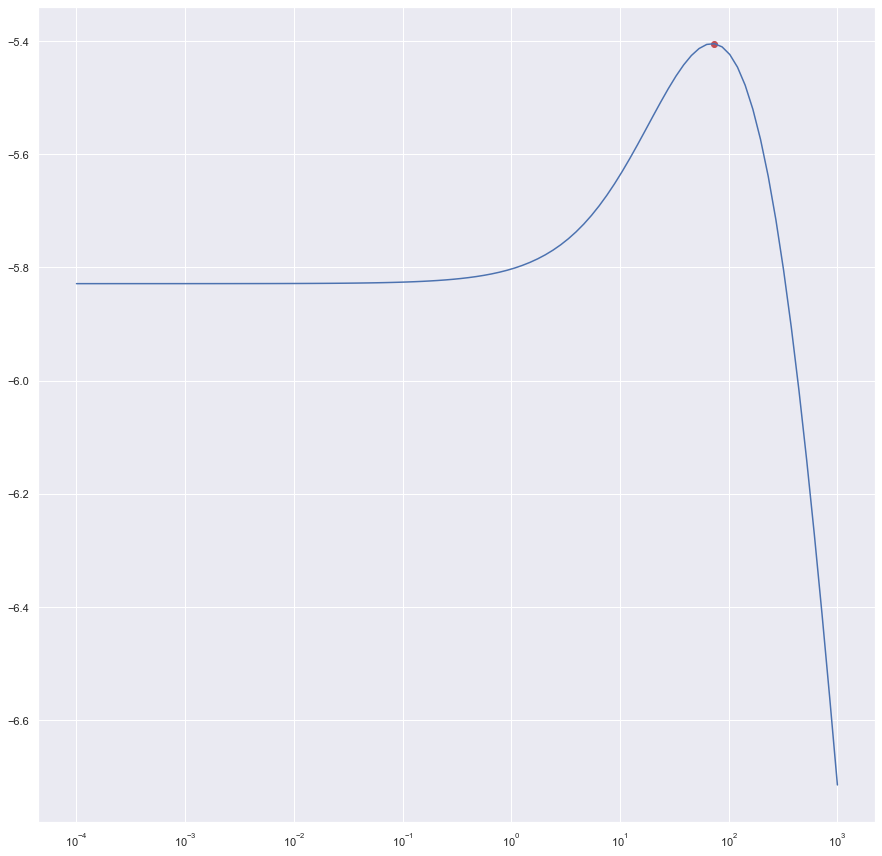

In [17]:
ids = np.arange(10,50)
plt.figure(figsize=(15,15))

plt.xscale('log',base=10)
arr = np.array(list(map(lambda x: x['alpha'], res['params'])))
vals = res['mean_test_score']

plt.plot(arr, vals)
plt.scatter([res['params'][best_alpha_index]['alpha']], [res['mean_test_score'][best_alpha_index]], c='r')

---
## Gradient descent

#### 6. [3.5 points] 
**Implement a linear regression model for the MSE loss function, trained by gradient descent.**

All calculations must be vectorized, and python loops can only be used for gradient descent iterations. As a stop criterion, you must use (simultaneously):

* checking for the Euclidean norm of the weight difference on two adjacent iterations (for example, less than some small number of the order of $10^{-6}$, set by the `tolerance` parameter);
* reaching the maximum number of iterations (for example, 10000, set by the `max_iter` parameter).

You need to implement:

* Full gradient descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Stochastic Gradient Descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ is the estimate of the gradient over the batch of objects selected randomly.

* Momentum method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} q_{i_{k}} (w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

Exponentially weighed averages can provide a better estimate which is closer to the actual gradient.


To make sure that the optimization process really converges, we will use the `loss_history` class attribute. After calling the `fit` method, it should contain the values of the loss function for all iterations, starting from the first one (before the first step on the anti-gradient).

You need to initialize the weights with a zero or random (from a normal distribution) vector. The following is a template class that needs to contain the code implementing all variations of the models.

### Calculations 

$$
\nabla_{w} Q(w_{k}) = \nabla_{w} (y-Xw)^{T} (y-Xw) = \nabla_{w} [y^{T} y - y^{T}Xw - w^{T}X^{T}y + w^{T}X^{T}Xw] =
$$

$$
=\nabla_{w} [-(y^{T}X)^{T} -X^{T}y + (X^{T}X + (X^{T}X)^{T})w] = -2X^{T}y + 2X^{T}Xw = 2X^{T}(Xw-y).
$$


In [18]:
from sklearn.base import BaseEstimator

class LinReg(BaseEstimator):
    def __init__(self, delta=0.2, gd_type='Momentum', 
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3):
        """
        gd_type: str
            'GradientDescent', 'StochasticDescent', 'Momentum'
        delta: float
            proportion of object in a batch (fot stochastic GD)
        tolerance: float
            for stopping gradient descent
        max_iter: int
            maximum number of steps in gradient descent
        w0: np.array of shape (d)
            init weights
        eta: float
            learning rate
        alpha: float
            momentum coefficient
        """
        
        self.gd_type = gd_type
        self.delta = delta
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
    
    def __full_iter(self, X, y):
        self.w -= self.eta * self.calc_gradient(X, y)
    
    def __stochastic_iter(self, X, y):
        randind = np.random.choice(len(X), self.batch_size, replace=False)
        rand_X, rand_y = X[randind], y[randind]
        self.w -= self.eta * self.calc_gradient(rand_X, rand_y)
        
    def __momentum_iter(self, X, y):
        randind = np.random.choice(len(X), self.batch_size, replace=False)
        rand_X, rand_y = X[randind], y[randind]
        
        dh = self.eta * self.calc_gradient(rand_X, rand_y)
        
        self.h = self.alpha * self.h + dh
        
        self.w -= self.h
        
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        
        iterations = 0
        
        X = np.column_stack([X, np.ones(X.shape[0])])
        
        if self.w0 is None:
            self.w = np.zeros(X.shape[1])
            self.w[-1] = np.mean(y)
        else:
            self.w = np.array(self.w0)
        
        if self.gd_type == 'Momentum':
            self.h = np.zeros(*self.w.shape)
            
        if self.gd_type != 'GradientDescent':
            self.batch_size = int(self.delta * X.shape[0])
            assert self.batch_size > 0, 'Batch size is too small.'
        
        
        self.loss_history = [self.calc_loss(X, y)]
        
        iter_function = {
            'GradientDescent' :   self.__full_iter,
            'StochasticDescent' : self.__stochastic_iter,
            'Momentum' :          self.__momentum_iter
        } [self.gd_type]
        
        while iterations < self.max_iter:
            
            prev_w = np.array(self.w)
            
            iter_function(X, y)
            
            if not np.all(np.isfinite(self.w)):
                self.w = prev_w
                return self
            
            self.loss_history.append(self.calc_loss(X, y))
            
            if np.sqrt(np.sum((prev_w - self.w)**2)) < self.tolerance:
                break
            
            iterations += 1
        
        return self
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        X = np.column_stack([X, np.ones(X.shape[0])])
        return X.dot(self.w)
    
    def __predict(self, X):
        return X.dot(self.w)
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        return 2*X.T.dot(self.__predict(X) - y)

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        return np.mean((self.__predict(X) - y)**2)

#### 7. [1 points] 
Train and validate "hand-written" model (simple linear regression) on the same data, and compare the quality with the Sklearn or StatsModels methods. Investigate the effect of the `max_iter` and `alpha` parameters on the optimization process. Is it consistent with your expectations?

### Max_iter

In [19]:
X = data_X

clsf = LinReg(gd_type='GradientDescent')

max_iter_parameters = {
    'eta': np.logspace(-8, -4, 25), 
    'max_iter': np.logspace(3, 5, 5)
}

max_iter_srch = GridSearchCV(
    estimator=clsf,
    scoring='neg_root_mean_squared_error', 
    param_grid=max_iter_parameters,
    n_jobs=-1
)

max_iter_srch.fit(X, y)

max_iter_srch.cv_results_

{'mean_fit_time': array([0.05396099, 0.1215786 , 0.17194505, 0.18641109, 0.18870034,
        0.0550561 , 0.14840488, 0.38947392, 0.43395352, 0.43126221,
        0.04767494, 0.13833275, 0.42647409, 0.55513148, 0.55722885,
        0.04577847, 0.14491873, 0.41809363, 0.66534286, 0.66504459,
        0.04109249, 0.14431829, 0.43226109, 0.7631815 , 0.74433093,
        0.04079161, 0.13424463, 0.41310787, 0.78014069, 0.7761488 ,
        0.04278646, 0.13574066, 0.41480398, 0.74882383, 0.76916699,
        0.04428377, 0.13743672, 0.41629801, 0.72927365, 0.75929675,
        0.04498081, 0.15329347, 0.44333005, 0.72179461, 0.71251993,
        0.04916949, 0.14701114, 0.44312811, 0.73326364, 0.73934946,
        0.0425868 , 0.15090189, 0.41101303, 0.77794456, 0.83529263,
        0.04278636, 0.16287031, 0.42906713, 0.79878974, 0.90680633,
        0.04837127, 0.1728435 , 0.44382629, 0.74283752, 0.79519982,
        0.04687638, 0.22809854, 0.51773639, 0.85644379, 0.75570517,
        0.0499671 , 0.14651518,

In [20]:
def plot_results(srch_obj, p1, p2, tol='.2f', is_log=True, get_dataframe=False, transpose=False):
    
    parameters = srch_obj.param_grid
    res = srch_obj.cv_results_
    
#     if transpose:
#         p1, p2 = p2, p1
    
    grid_param_1 = parameters[p1]
    grid_param_2 = parameters[p2]

    scores_mean = res['mean_test_score']
    
    if not transpose:
        scores_mean = np.array(scores_mean).reshape(len(grid_param_1), len(grid_param_2)).T
    else:
        scores_mean = np.array(scores_mean).reshape(len(grid_param_2), len(grid_param_1))
    
    plt.figure(figsize=(16,10))
    
    if is_log:
        plt.xscale('log',base=10) 

    d = {'X':grid_param_1}
        
    for idx, val in enumerate(grid_param_2):
        vals = scores_mean[idx,:]
        title = f'{p2}: {f"{{0{tol}}}".format(val)}'
        
        plt.plot(grid_param_1, vals, '-o', label=title)
        if get_dataframe:
            d[title] = vals
            
    plt.title("Grid Search Results", fontsize=16)
    plt.xlabel(p1, fontsize=16)
    plt.ylabel('Average neg_root_mean_sqaured_error', fontsize=16)
    plt.legend(loc="best", fontsize=16)
    
    if get_dataframe:
        return pd.DataFrame(d)

This is a plot of negative loss vs. eta for different values `max_iter`. The values are sampled to be equaliy spaced in a log scale

AttributeError: 'numpy.float64' object has no attribute '2f'

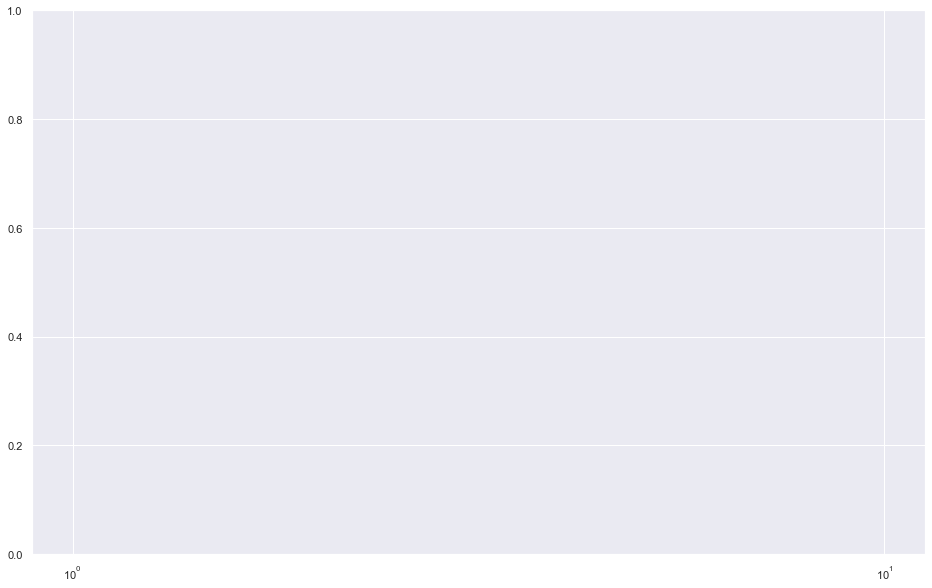

In [21]:
p1 = 'eta'
p2 = 'max_iter'

df = plot_results(max_iter_srch, p1, p2, get_dataframe=True)

The graphs loss vs. eta for different values of `max_iter` seem to match each other exactly with some extra offset.

Let's plot the graphs for max_iter `1000`, `3162` and `10000` with added offsets (the x-axis is logorithmic)

In [ ]:
plt.figure(figsize=(10,10))

plt.xscale('log', base=10) 

plt.plot(df.X * 1000.0, df['max_iter: 1000.00'])
plt.plot(df.X * 3162.28, df['max_iter: 3162.28'])
plt.plot(df.X * 10000.0, df['max_iter: 10000.00'])

# Do not match the pattern
plt.plot(df.X * 31622.78, df['max_iter: 31622.78'], '--')
plt.plot(df.X * 100000.0, df['max_iter: 100000.00'], '--')

```Conclusion```

As we can see, for `max_iter` of `1000`, `3162` and `10000` the graphs are basically the same after adding some offset. However, for `31622` and `100000` the pattern breaks. Additionally, on the original diagram (Grid Search Results),
the `loss vs. eta` graphs for `31622` and `100000` are equal.

So it seems like there is a critical point, after which increasing `max_iter` has no effect. This value is somewhere between `10000` and `31622`. 

Otherwise, as long as the value of `max_iter` x `eta` stays constant, the loss stays roughly the same.

This goes against my expectations, since I thought that increasing max_iter would increase the quality of the model.

The quality of this model with the best params seems to match and even exceed the quality from sklearn (neg_rmse ~= -5.8)

In [ ]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(LinearRegression(), X, y, scoring='neg_root_mean_squared_error'))

Best value for `max_iter` x `eta`

In [ ]:
max_iter_best_val = df.X[df['max_iter: 1000.00'].argmax()] * 1000

In [ ]:
max_iter_best_val 

### Alpha

In [ ]:
X = data_X

clsf = LinReg(delta=1.0, max_iter=1000)

parameters = {
    'alpha': 1 - np.logspace(-1.3, -0.3, 5),
    'eta': np.logspace(-9, -5, 15),
}

alpha_srch = GridSearchCV(
    estimator=clsf,
    scoring='neg_root_mean_squared_error', 
    param_grid=parameters,
)

alpha_srch.fit(X, y)

alpha_srch.cv_results_

This is a plot of negative loss vs. eta for different values `alpha`. The values are sampled such that `1 - alpha` is  equaliy spaced in a log scale

In [ ]:
p1 = 'eta'
p2 = 'alpha'

df = plot_results(alpha_srch, p1, p2, tol=':.2f', is_log=True, get_dataframe=True, transpose=True)

The graphs loss vs. eta for different values of `alpha` seem to match each other exactly with some extra offset.

Let's plot these graphs with some added offsets (the x-axis is logorithmic)

In [ ]:
plt.figure(figsize=(10,10))

one_minus_alpha = np.logspace(-1.3, -0.3, 5)

plt.xscale('log', base=10) 

cols = list(df.columns)[1:]

for i in range(len(cols)):
    plt.plot(df.X / one_minus_alpha[i], df[cols[i]])

```Conclusion```

All the graphs seem to match after we divided the x scale by the value of `1 - alpha` corresponding to the graph.

It seems that as long as `eta / (1 - alpha)` stays constant, the loss stays roughly the same.

To sum up, both optimal `max_iter` and `alpha` depend on `eta`, and the best loss is reached when  

`eta / (1 - alpha)` = 1.4359617019622137e-05

and `max_iter x eta` = 0.004641588833612773

In [ ]:
alpha_best_val = df.X[df['alpha: 0.95'].argmax()] / one_minus_alpha[0]
alpha_best_val

In [ ]:
max_iter_best_val 

#### 8. [1 points] 
Plot graphs (on the same picture) of the dependence of the loss function value on the iteration number for Full GD, SGD and Momentum. Draw conclusions about the rate of convergence of various modifications of gradient descent.

Don't forget about what *beautiful* graphics should look like!

### GD_type

In [ ]:
X = data_X

clsf = LinReg(delta = 0.4, eta=0.000004641588833612773, alpha=.8)

type_parameters = {
    'max_iter': np.logspace(2, 4, 10), 
    'gd_type': [
        'GradientDescent',
        'StochasticDescent',
        'Momentum'
    ]
}

type_srch = GridSearchCV(
    estimator=clsf,
    scoring='neg_root_mean_squared_error', 
    param_grid=type_parameters,
)

type_srch.fit(X, y)

type_srch.cv_results_

In [ ]:
p1 = 'max_iter'
p2 = 'gd_type'

plot_results(type_srch, p1, p2, tol='', transpose=True)

```Conclusion```

The Momemtum method converges the fastest, 

The Gradient Descent method is the second,

and the Stochastic Descent is the slowest